In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/dataset.csv', sep=",")

In [ ]:
df

,Unnamed: 0,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
0,0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643


In [ ]:
df['device_type'].unique()

array(['prtbl trm', 'port_trm', 'atm', 'ATM', 'cash_out', 'Portable term',
       'cash_in', 'pos trm'], dtype=object)

In [ ]:
df['tran_code'].unique()

array([ 30,  25,  10,  -1, 451,  20, 991])

In [ ]:
df['card_status'].unique()

array(['active', 'act', 'blk', 'blocked'], dtype=object)

In [ ]:
df['oper_type'].unique()

array(['transfer', 'diff_cntry', 'in_acc', 'err', 'country_transfer',
       'add_on_acc', 'payment', 'in', 'out', 'bad', 'from_acc',
       'err_code', 'decrease_on_acc', 'blk', 'blocked'], dtype=object)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/dataset2.csv', sep=",")
df.set_index('id')

,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
id,,,,,,,,,,,,,,,
0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982


In [ ]:
df.tail(75)

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
53004,53004,9949324,82.200.0.195,624.0,atm,20,5533,841284706,CREDIT,0,active,2026-06-11,2024-11-25 16:06:20,121.82,decrease_on_acc,566211.626140
53005,53005,9944818,193.0.145.45,489.0,atm,451,3868,514990118,DEBIT,0,active,2027-04-30,2024-11-17 19:48:42,660.95,payment,727234.281724
53006,53006,9969457,185.1.0.120,878.0,atm,451,1554,418851665,DEBIT,0,act,2030-12-15,2024-10-22 15:42:23,898.05,payment,957783.480175
53007,53007,9934705,212.13.0.75,241.0,atm,-1,2110,254699086,DEBIT,1,active,2026-08-03,2024-11-21 13:55:11,1161.08,err_code,366452.951481
53008,53008,9684714,188.0.175.30,1432.0,atm,451,4843,607981614,CREDIT,0,active,2025-08-08,2024-11-23 21:27:37,449.15,payment,374570.966000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643


In [ ]:
df['pin_inc_count'].value_counts()

,count
pin_inc_count,
0,46178
1,6063
2,751
3,87


In [ ]:
filtered_df_by_blocked = df[(df['card_status'] == 'blk') | (df['card_status'] == 'blocked')]

In [ ]:
filtered_df_by_blocked

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
364,364,9572404,86.111.0.15,1342.0,pos trm,-1,8860,854388310,CREDIT,3,blk,2026-07-16,2024-10-30 22:46:07,993.05,err,0.00
502,502,4412565,62.118.0.210,537.0,ATM,-1,9112,719370723,DEBIT,3,blocked,2025-06-21,2024-11-26 23:44:57,756.00,err_code,365939.53
627,627,4559799,46.0.2.180,194.0,cash_in,-1,4127,145330378,DEBIT,3,blocked,2028-05-01,2024-10-31 09:54:56,1053.18,err,900446.09
935,935,5981674,46.8.0.225,785.0,ATM,-1,9102,357284945,CREDIT,3,blocked,2025-07-16,2024-11-19 09:44:45,515.77,err_code,0.00
977,977,7233473,37.0.123.30,320.0,cash_in,-1,3153,678527916,CREDIT,3,blocked,2028-08-01,2024-10-15 07:04:06,912.14,err,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,6920687,78.24.158.219,949.0,port_trm,-1,4342,852995547,DEBIT,3,blk,2026-09-06,2024-11-13 17:35:38,1173.01,err_code,638294.93
50300,50300,4043142,195.161.0.210,1179.0,atm,-1,5750,314372290,DEBIT,3,blk,2027-02-18,2024-11-09 09:56:21,130.72,bad,231422.90
50712,50712,4557581,194.0.144.0,158.0,cash_out,-1,6143,493677673,DEBIT,3,blk,2028-05-18,2024-10-29 20:12:34,712.01,err,625613.73
51086,51086,7386289,46.0.0.120,663.0,prtbl trm,-1,7986,657293615,DEBIT,3,blocked,2029-01-27,2024-10-19 23:06:08,187.00,bad,864697.25


In [ ]:
filtered_df_by_blocked['tran_code'].unique()

array([ -1, 991])

In [ ]:
value_counts = filtered_df_by_blocked['pin_inc_count'].value_counts()
value_counts

,count
pin_inc_count,
3,87
1,1
0,1


In [ ]:
value_counts = filtered_df_by_blocked['tran_code'].value_counts()
value_counts

,count
tran_code,
-1,87
991,2


In [ ]:
value_counts = filtered_df_by_blocked['oper_type'].value_counts()
value_counts

,count
oper_type,
bad,31
err,29
err_code,27
blk,1
blocked,1


In [ ]:
value_counts = df['oper_type'].value_counts()
value_counts

,count
oper_type,
payment,13204
transfer,8826
diff_cntry,4204
country_transfer,4155
in_acc,2769
decrease_on_acc,2665
in,2657
from_acc,2595
out,2587


In [ ]:
filtered_df_by_blocked = df[(df['oper_type'] == 'blk') | (df['oper_type'] == 'blocked')]

In [ ]:
filtered_df_by_blocked

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
23182,23182,7625112,195.143.0.105,1370.0,prtbl trm,991,4381,161628126,DEBIT,1,blocked,2024-11-29,2024-10-31 09:50:54,767.73,blk,741063.02
48011,48011,2458932,81.17.0.135,1393.0,pos trm,991,4608,138843487,CREDIT,0,blk,2024-11-29,2024-08-17 00:39:56,328.02,blocked,0.00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/dataset0.csv', sep=",")
df

,Unnamed: 0,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
0,0,1157921,91.107.0.90,982,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 9:56:51,510.22,transfer,670814.7800
1,1,1595205,37.0.127.150,1033,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 9:38:45,509.84,transfer,670304.9400
2,2,1656884,185.233.0.240,96,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.0800
3,3,1673909,91.107.0.90,982,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 2:18:28,510.05,transfer,669285.0300
4,4,1689203,188.43.0.135,1413,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 9:22:18,510.01,in_acc,669795.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 9:38:58,521.37,country_transfer,183309.1304
53075,53075,9902369,91.122.0.15,431,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 3:44:07,618.99,add_on_acc,337518.8802
53076,53076,9939711,2.94.0.240,1042,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.9330
53077,53077,9876313,188.0.162.75,494,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.8496


In [ ]:
df['is_scum'] = np.where((df['tran_code'] == -1), False, True)
df

,Unnamed: 0,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,is_scum
0,0,1157921,91.107.0.90,982,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 9:56:51,510.22,transfer,670814.7800,True
1,1,1595205,37.0.127.150,1033,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 9:38:45,509.84,transfer,670304.9400,True
2,2,1656884,185.233.0.240,96,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.0800,True
3,3,1673909,91.107.0.90,982,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 2:18:28,510.05,transfer,669285.0300,True
4,4,1689203,188.43.0.135,1413,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 9:22:18,510.01,in_acc,669795.0400,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 9:38:58,521.37,country_transfer,183309.1304,True
53075,53075,9902369,91.122.0.15,431,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 3:44:07,618.99,add_on_acc,337518.8802,True
53076,53076,9939711,2.94.0.240,1042,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.9330,True
53077,53077,9876313,188.0.162.75,494,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.8496,True


In [ ]:
df[['is_scum']].to_csv('preds3.csv', header=False, index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/dataset2.csv', sep=",")
df.set_index('id')

,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
id,,,,,,,,,,,,,,,
0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982


In [ ]:
df = df.drop(columns=['transaction_id'])
df.set_index('id')

,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
id,,,,,,,,,,,,,,
0,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982


In [ ]:
df['device_type'] = df['device_type'].str.lower()
df

,id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
0,0,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,2,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,3,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,4,188.43.0.135,1413.0,atm,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,53075,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,53076,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982
53077,53077,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643


In [ ]:
mapping = {
    'prtbl trm': 'portable_term',
    'port_trm': 'portable_term',
    'portable term': 'portable_term',
    'atm': 'atm',
    'cash_out': 'cash_out',
    'cash_in': 'cash_in',
    'pos trm': 'pos_terminal'
}
df['device_type'] = df['device_type'].replace(mapping)
df

,id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
0,0,91.107.0.90,982.0,portable_term,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1,37.0.127.150,1033.0,portable_term,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,2,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,3,91.107.0.90,982.0,portable_term,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,4,188.43.0.135,1413.0,atm,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,53075,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,53076,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982
53077,53077,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643


In [ ]:
df['device_type'].unique()

array(['portable_term', 'atm', 'cash_out', 'cash_in', 'pos_terminal'],
      dtype=object)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['device_type'])
df_encoded

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,device_type_atm,device_type_cash_in,device_type_cash_out,device_type_portable_term,device_type_pos_terminal
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False,False,False,True,False
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False,False,False,True,False
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,True,False,False,False,False
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False,False,False,True,False
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True,False,False,False,False
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True,False,False,False,False
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True,False,False,False,False
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True,False,False,False,False


In [ ]:

# Преобразование только новых столбцов в тип int
df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('device_type')]] = df_encoded[df_encoded.columns[df_encoded.columns.str.startswith('device_type')]].astype(int)
df_encoded

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,device_type_atm,device_type_cash_in,device_type_cash_out,device_type_portable_term,device_type_pos_terminal
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,0,0,0,1,0
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,0,0,0,1,0
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,1,0,0,0,0
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,0,0,0,1,0
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,1,0,0,0,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,1,0,0,0,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,1,0,0,0,0
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df_encoded['balance'] = scaler.fit_transform(df_encoded[['balance']])
df_encoded

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,device_type_atm,device_type_cash_in,device_type_cash_out,device_type_portable_term,device_type_pos_terminal
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,0.670969,0,0,0,1,0
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,0.670459,0,0,0,1,0
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,0.669949,1,0,0,0,0
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,0.669439,0,0,0,1,0
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,0.669949,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,0.183351,1,0,0,0,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,0.337597,1,0,0,0,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,0.115219,1,0,0,0,0
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,0.128459,1,0,0,0,0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/dataset2.csv', sep=",")
df1.set_index('id')

,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
id,,,,,,,,,,,,,,,
0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000
1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000
2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000
3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000
4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385
53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175
53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_transactions/preds.csv', sep=",", header=None, names=['pred'])
df2

,pred
0,False
1,False
2,False
3,False
4,False
...,...
53074,True
53075,True
53076,True
53077,True


In [ ]:
df = pd.concat([df1, df2], axis=1)
df.set_index('id')

,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
id,,,,,,,,,,,,,,,,
0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True


In [ ]:
df_combined = pd.concat([df1, df2], axis=1)
df_combined.set_index('id')

,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
id,,,,,,,,,,,,,,,,
0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True


In [ ]:
filtered_df_by_pred_true = df_combined[(df_combined['pred'] == True)]
filtered_df_by_pred_true

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
364,1450115087,1342.0,-1,8860,854388310,3,1.784160e+09,1.730328e+09,993.05,0.000000,...,0,0,0,0,0,0,1,0,1,0
502,1047920850,537.0,-1,9112,719370723,3,1.750464e+09,1.732665e+09,756.00,365939.530000,...,0,0,0,0,0,0,0,1,0,1
627,771752628,194.0,-1,4127,145330378,3,1.840752e+09,1.730368e+09,1053.18,900446.090000,...,0,0,0,0,0,0,0,1,0,1
935,772276449,785.0,-1,9102,357284945,3,1.752624e+09,1.732009e+09,515.77,0.000000,...,0,0,0,0,0,0,0,1,1,0
977,620788510,320.0,-1,3153,678527916,3,1.848701e+09,1.728976e+09,912.14,0.000000,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,183309.130385,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,337518.880175,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,115192.932982,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,128429.849643,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
filtered_df_by_pred_false = df_combined[(df_combined['pred'] == False)]
filtered_df_by_pred_false

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.78,False
1,1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.94,False
2,2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.08,False
3,3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.03,False
4,4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52161,52161,9076615,95.167.0.60,204.0,ATM,20,4966,860457500,CREDIT,0,active,2027-04-11,2024-07-19 22:29:16,497.04,out,147491.09,False
52162,52162,9214931,78.24.158.219,949.0,port_trm,25,5953,860457500,CREDIT,0,active,2027-04-11,2024-08-14 09:59:07,497.03,diff_cntry,146994.06,False
52163,52163,9432033,95.106.0.120,553.0,cash_in,25,5863,860457500,CREDIT,0,active,2027-04-11,2024-09-10 17:02:49,496.73,diff_cntry,146497.33,False
52164,52164,9757099,95.106.0.120,553.0,cash_in,30,8719,860457500,CREDIT,0,active,2027-04-11,2024-09-16 07:17:07,496.90,transfer,146000.43,False


In [ ]:
filtered_df_by_pred_false['client_id'].value_counts().head(10)

,count
client_id,
545445024,59
316136270,59
111449910,59
296726164,59
241086269,59
305375831,59
529758209,59
816927907,59
483027660,59


In [ ]:
filtered_df_by_pred_true['device_id'].value_counts().head(10)

,count
device_id,
272.0,45
1290.0,44
1158.0,44
494.0,44
407.0,44
932.0,44
1432.0,44
1042.0,44
1293.0,44


In [ ]:
filter1234 = filtered_df_by_pred_false[(filtered_df_by_pred_false['device_id'] == 1432.0)]
filter1234

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred


In [ ]:
filtered_df_by_pred_true['oper_type'].value_counts()

,count
oper_type,
payment,231
transfer,157
err,75
diff_cntry,75
err_code,73
country_transfer,70
bad,68
in_acc,49
in,46


In [ ]:
import seaborn as sns

<Axes: xlabel='ip', ylabel='pin_inc_count'>

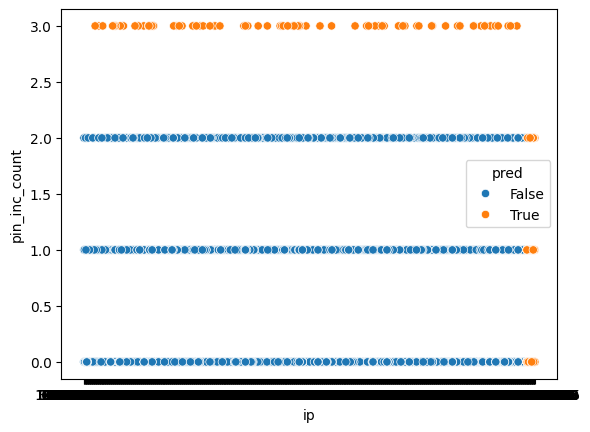

In [ ]:
sns.scatterplot(x="ip", y="pin_inc_count", data=df_combined, hue="pred")

In [ ]:
df_combined['tran_code'].value_counts()

,count
tran_code,
451,13204
30,8826
25,8359
10,7941
20,7847
-1,6900


In [ ]:
df_combined = df_combined[df_combined['tran_code'] != 991]

In [ ]:
df_combined

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True


In [ ]:
sns.scatterplot(x="ip", y="pin_inc_count", data=filtered_df_by_pred_true)

NameError: name 'filtered_df_by_pred_true' is not defined

In [ ]:
df_combined

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True


In [ ]:
df_combined = df_combined.drop(columns=['transaction_id'])
df_combined

,id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,2,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,3,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,4,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True


In [ ]:
df_combined[df_combined.columns[df_combined.columns.str.startswith('pred')]] = df_combined[df_combined.columns[df_combined.columns.str.startswith('pred')]].astype(int)
df_combined

,id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,0
1,1,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,0
2,2,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,0
3,3,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,0
4,4,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,1
53075,53075,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,1
53076,53076,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,1
53077,53077,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,1


In [ ]:
df_combined = pd.get_dummies(df_combined, columns=['device_type'])
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,...,balance,pred,device_type_ATM,device_type_Portable term,device_type_atm,device_type_cash_in,device_type_cash_out,device_type_port_trm,device_type_pos trm,device_type_prtbl trm
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,...,670814.780000,0,False,False,False,False,False,False,False,True
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,...,670304.940000,0,False,False,False,False,False,True,False,False
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,...,669795.080000,0,False,False,True,False,False,False,False,False
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,...,669285.030000,0,False,False,False,False,False,False,False,True
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,...,669795.040000,0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,...,183309.130385,1,False,False,True,False,False,False,False,False
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,...,337518.880175,1,False,False,True,False,False,False,False,False
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,...,115192.932982,1,False,False,True,False,False,False,False,False
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,...,128429.849643,1,False,False,True,False,False,False,False,False


In [ ]:
# Преобразование только новых столбцов в тип int
df_combined[df_combined.columns[df_combined.columns.str.startswith('device_type')]] = df_combined[df_combined.columns[df_combined.columns.str.startswith('device_type')]].astype(int)
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,...,balance,pred,device_type_ATM,device_type_Portable term,device_type_atm,device_type_cash_in,device_type_cash_out,device_type_port_trm,device_type_pos trm,device_type_prtbl trm
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,...,670814.780000,0,0,0,0,0,0,0,0,1
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,...,670304.940000,0,0,0,0,0,0,1,0,0
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,...,669795.080000,0,0,0,1,0,0,0,0,0
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,...,669285.030000,0,0,0,0,0,0,0,0,1
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,...,669795.040000,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,...,183309.130385,1,0,0,1,0,0,0,0,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,...,337518.880175,1,0,0,1,0,0,0,0,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,...,115192.932982,1,0,0,1,0,0,0,0,0
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,...,128429.849643,1,0,0,1,0,0,0,0,0


In [ ]:
df_combined = pd.get_dummies(df_combined, columns=['oper_type'])
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,...,oper_type_decrease_on_acc,oper_type_diff_cntry,oper_type_err,oper_type_err_code,oper_type_from_acc,oper_type_in,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,...,False,False,False,False,False,False,False,False,False,True
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,...,False,False,False,False,False,False,False,False,False,True
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,...,False,True,False,False,False,False,False,False,False,False
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,...,False,False,False,False,False,False,False,False,False,True
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,...,False,False,False,False,False,False,False,False,False,False
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,...,False,False,False,False,False,False,False,False,False,False
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,...,False,False,False,False,False,False,True,False,False,False
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Преобразование только новых столбцов в тип int
df_combined[df_combined.columns[df_combined.columns.str.startswith('oper_type')]] = df_combined[df_combined.columns[df_combined.columns.str.startswith('oper_type')]].astype(int)
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,...,oper_type_decrease_on_acc,oper_type_diff_cntry,oper_type_err,oper_type_err_code,oper_type_from_acc,oper_type_in,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,active,2030-06-10,...,0,0,0,0,0,0,0,0,0,1
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,active,2030-06-10,...,0,0,0,0,0,0,0,0,0,1
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,active,2030-06-10,...,0,1,0,0,0,0,0,0,0,0
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,active,2030-06-10,...,0,0,0,0,0,0,0,0,0,1
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,active,2030-06-10,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,act,2028-01-25,...,0,0,0,0,0,0,0,0,0,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,active,2028-08-16,...,0,0,0,0,0,0,0,0,0,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,active,2030-03-08,...,0,0,0,0,0,0,1,0,0,0
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,act,2025-06-04,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_combined = pd.get_dummies(df_combined, columns=['card_status'])
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,expiration_date,datetime,...,oper_type_from_acc,oper_type_in,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,2030-06-10,2022-03-09 09:56:51,...,0,0,0,0,0,1,False,True,False,False
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,2030-06-10,2022-03-10 09:38:45,...,0,0,0,0,0,1,False,True,False,False
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,2030-06-10,2022-03-21 23:29:57,...,0,0,0,0,0,0,False,True,False,False
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,2030-06-10,2022-03-24 02:18:28,...,0,0,0,0,0,1,False,True,False,False
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,2030-06-10,2022-07-07 09:22:18,...,0,0,1,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,2028-01-25,2024-10-28 09:38:58,...,0,0,0,0,0,0,True,False,False,False
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,2028-08-16,2024-11-13 03:44:07,...,0,0,0,0,0,0,False,True,False,False
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,2030-03-08,2024-11-04 14:41:05,...,0,0,1,0,0,0,False,True,False,False
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,2025-06-04,2024-11-23 22:36:43,...,0,0,0,0,0,0,True,False,False,False


In [ ]:
# Преобразование только новых столбцов в тип int
df_combined[df_combined.columns[df_combined.columns.str.startswith('card_status')]] = df_combined[df_combined.columns[df_combined.columns.str.startswith('card_status')]].astype(int)
df_combined

,id,ip,device_id,tran_code,mcc,client_id,card_type,pin_inc_count,expiration_date,datetime,...,oper_type_from_acc,oper_type_in,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked
0,0,91.107.0.90,982.0,30,7103,969838140,DEBIT,0,2030-06-10,2022-03-09 09:56:51,...,0,0,0,0,0,1,0,1,0,0
1,1,37.0.127.150,1033.0,30,2031,969838140,DEBIT,0,2030-06-10,2022-03-10 09:38:45,...,0,0,0,0,0,1,0,1,0,0
2,2,185.233.0.240,96.0,25,4629,969838140,DEBIT,0,2030-06-10,2022-03-21 23:29:57,...,0,0,0,0,0,0,0,1,0,0
3,3,91.107.0.90,982.0,30,4629,969838140,DEBIT,0,2030-06-10,2022-03-24 02:18:28,...,0,0,0,0,0,1,0,1,0,0
4,4,188.43.0.135,1413.0,10,5840,969838140,DEBIT,0,2030-06-10,2022-07-07 09:22:18,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,CREDIT,0,2028-01-25,2024-10-28 09:38:58,...,0,0,0,0,0,0,1,0,0,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,CREDIT,0,2028-08-16,2024-11-13 03:44:07,...,0,0,0,0,0,0,0,1,0,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,DEBIT,0,2030-03-08,2024-11-04 14:41:05,...,0,0,1,0,0,0,0,1,0,0
53077,53077,188.0.162.75,494.0,25,7602,191845802,CREDIT,0,2025-06-04,2024-11-23 22:36:43,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_combined = pd.get_dummies(df_combined, columns=['card_type'])
df_combined

,id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,0,91.107.0.90,982.0,30,7103,969838140,0,2030-06-10,2022-03-09 09:56:51,510.22,...,0,0,0,1,0,1,0,0,False,True
1,1,37.0.127.150,1033.0,30,2031,969838140,0,2030-06-10,2022-03-10 09:38:45,509.84,...,0,0,0,1,0,1,0,0,False,True
2,2,185.233.0.240,96.0,25,4629,969838140,0,2030-06-10,2022-03-21 23:29:57,509.86,...,0,0,0,0,0,1,0,0,False,True
3,3,91.107.0.90,982.0,30,4629,969838140,0,2030-06-10,2022-03-24 02:18:28,510.05,...,0,0,0,1,0,1,0,0,False,True
4,4,188.43.0.135,1413.0,10,5840,969838140,0,2030-06-10,2022-07-07 09:22:18,510.01,...,1,0,0,0,0,1,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,0,2028-01-25,2024-10-28 09:38:58,521.37,...,0,0,0,0,1,0,0,0,True,False
53075,53075,91.122.0.15,431.0,10,7071,364757022,0,2028-08-16,2024-11-13 03:44:07,618.99,...,0,0,0,0,0,1,0,0,True,False
53076,53076,2.94.0.240,1042.0,10,3686,828308371,0,2030-03-08,2024-11-04 14:41:05,956.15,...,1,0,0,0,0,1,0,0,False,True
53077,53077,188.0.162.75,494.0,25,7602,191845802,0,2025-06-04,2024-11-23 22:36:43,1194.06,...,0,0,0,0,1,0,0,0,True,False


In [ ]:
# Преобразование только новых столбцов в тип int
df_combined[df_combined.columns[df_combined.columns.str.startswith('card_type')]] = df_combined[df_combined.columns[df_combined.columns.str.startswith('card_type')]].astype(int)
df_combined

,id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,0,91.107.0.90,982.0,30,7103,969838140,0,2030-06-10,2022-03-09 09:56:51,510.22,...,0,0,0,1,0,1,0,0,0,1
1,1,37.0.127.150,1033.0,30,2031,969838140,0,2030-06-10,2022-03-10 09:38:45,509.84,...,0,0,0,1,0,1,0,0,0,1
2,2,185.233.0.240,96.0,25,4629,969838140,0,2030-06-10,2022-03-21 23:29:57,509.86,...,0,0,0,0,0,1,0,0,0,1
3,3,91.107.0.90,982.0,30,4629,969838140,0,2030-06-10,2022-03-24 02:18:28,510.05,...,0,0,0,1,0,1,0,0,0,1
4,4,188.43.0.135,1413.0,10,5840,969838140,0,2030-06-10,2022-07-07 09:22:18,510.01,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,91.122.0.15,431.0,25,3193,526745565,0,2028-01-25,2024-10-28 09:38:58,521.37,...,0,0,0,0,1,0,0,0,1,0
53075,53075,91.122.0.15,431.0,10,7071,364757022,0,2028-08-16,2024-11-13 03:44:07,618.99,...,0,0,0,0,0,1,0,0,1,0
53076,53076,2.94.0.240,1042.0,10,3686,828308371,0,2030-03-08,2024-11-04 14:41:05,956.15,...,1,0,0,0,0,1,0,0,0,1
53077,53077,188.0.162.75,494.0,25,7602,191845802,0,2025-06-04,2024-11-23 22:36:43,1194.06,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
import ipaddress

In [ ]:
df_combined['ip'] = df_combined['ip'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_combined

,id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,0,1533739098,982.0,30,7103,969838140,0,2030-06-10,2022-03-09 09:56:51,510.22,...,0,0,0,1,0,1,0,0,0,1
1,1,620789654,1033.0,30,2031,969838140,0,2030-06-10,2022-03-10 09:38:45,509.84,...,0,0,0,1,0,1,0,0,0,1
2,2,3119055088,96.0,25,4629,969838140,0,2030-06-10,2022-03-21 23:29:57,509.86,...,0,0,0,0,0,1,0,0,0,1
3,3,1533739098,982.0,30,4629,969838140,0,2030-06-10,2022-03-24 02:18:28,510.05,...,0,0,0,1,0,1,0,0,0,1
4,4,3156934791,1413.0,10,5840,969838140,0,2030-06-10,2022-07-07 09:22:18,510.01,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,1534722063,431.0,25,3193,526745565,0,2028-01-25,2024-10-28 09:38:58,521.37,...,0,0,0,0,1,0,0,0,1,0
53075,53075,1534722063,431.0,10,7071,364757022,0,2028-08-16,2024-11-13 03:44:07,618.99,...,0,0,0,0,0,1,0,0,1,0
53076,53076,39715056,1042.0,10,3686,828308371,0,2030-03-08,2024-11-04 14:41:05,956.15,...,1,0,0,0,0,1,0,0,0,1
53077,53077,3154158155,494.0,25,7602,191845802,0,2025-06-04,2024-11-23 22:36:43,1194.06,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_combined['datetime'] = pd.to_datetime(df_combined['datetime'])
df_combined['datetime'] = df_combined['datetime'].apply(lambda x: x.timestamp())
df_combined

,id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,0,1533739098,982.0,30,7103,969838140,0,2030-06-10,1.646820e+09,510.22,...,0,0,0,1,0,1,0,0,0,1
1,1,620789654,1033.0,30,2031,969838140,0,2030-06-10,1.646905e+09,509.84,...,0,0,0,1,0,1,0,0,0,1
2,2,3119055088,96.0,25,4629,969838140,0,2030-06-10,1.647905e+09,509.86,...,0,0,0,0,0,1,0,0,0,1
3,3,1533739098,982.0,30,4629,969838140,0,2030-06-10,1.648088e+09,510.05,...,0,0,0,1,0,1,0,0,0,1
4,4,3156934791,1413.0,10,5840,969838140,0,2030-06-10,1.657186e+09,510.01,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,1534722063,431.0,25,3193,526745565,0,2028-01-25,1.730108e+09,521.37,...,0,0,0,0,1,0,0,0,1,0
53075,53075,1534722063,431.0,10,7071,364757022,0,2028-08-16,1.731469e+09,618.99,...,0,0,0,0,0,1,0,0,1,0
53076,53076,39715056,1042.0,10,3686,828308371,0,2030-03-08,1.730731e+09,956.15,...,1,0,0,0,0,1,0,0,0,1
53077,53077,3154158155,494.0,25,7602,191845802,0,2025-06-04,1.732401e+09,1194.06,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_combined['expiration_date'] = pd.to_datetime(df_combined['expiration_date'])
df_combined['expiration_date'] = df_combined['expiration_date'].apply(lambda x: x.timestamp())
df_combined

,id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,0,1533739098,982.0,30,7103,969838140,0,1.907280e+09,1.646820e+09,510.22,...,0,0,0,1,0,1,0,0,0,1
1,1,620789654,1033.0,30,2031,969838140,0,1.907280e+09,1.646905e+09,509.84,...,0,0,0,1,0,1,0,0,0,1
2,2,3119055088,96.0,25,4629,969838140,0,1.907280e+09,1.647905e+09,509.86,...,0,0,0,0,0,1,0,0,0,1
3,3,1533739098,982.0,30,4629,969838140,0,1.907280e+09,1.648088e+09,510.05,...,0,0,0,1,0,1,0,0,0,1
4,4,3156934791,1413.0,10,5840,969838140,0,1.907280e+09,1.657186e+09,510.01,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,...,0,0,0,0,1,0,0,0,1,0
53075,53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,...,0,0,0,0,0,1,0,0,1,0
53076,53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,...,1,0,0,0,0,1,0,0,0,1
53077,53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_combined = df_combined.drop(columns=['id'])
df_combined

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,1533739098,982.0,30,7103,969838140,0,1.907280e+09,1.646820e+09,510.22,670814.780000,...,0,0,0,1,0,1,0,0,0,1
1,620789654,1033.0,30,2031,969838140,0,1.907280e+09,1.646905e+09,509.84,670304.940000,...,0,0,0,1,0,1,0,0,0,1
2,3119055088,96.0,25,4629,969838140,0,1.907280e+09,1.647905e+09,509.86,669795.080000,...,0,0,0,0,0,1,0,0,0,1
3,1533739098,982.0,30,4629,969838140,0,1.907280e+09,1.648088e+09,510.05,669285.030000,...,0,0,0,1,0,1,0,0,0,1
4,3156934791,1413.0,10,5840,969838140,0,1.907280e+09,1.657186e+09,510.01,669795.040000,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,183309.130385,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,337518.880175,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,115192.932982,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,128429.849643,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_combined['client_id'].value_counts()

,count
client_id,
545445024,61
316136270,60
111449910,60
296726164,60
241086269,60
...,...
572585457,4
184163557,4
969547546,3


In [ ]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.startswith('device_type')]
df_combined

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,1533739098,982.0,30,7103,969838140,0,1.907280e+09,1.646820e+09,510.22,670814.780000,...,0,0,0,1,0,1,0,0,0,1
1,620789654,1033.0,30,2031,969838140,0,1.907280e+09,1.646905e+09,509.84,670304.940000,...,0,0,0,1,0,1,0,0,0,1
2,3119055088,96.0,25,4629,969838140,0,1.907280e+09,1.647905e+09,509.86,669795.080000,...,0,0,0,0,0,1,0,0,0,1
3,1533739098,982.0,30,4629,969838140,0,1.907280e+09,1.648088e+09,510.05,669285.030000,...,0,0,0,1,0,1,0,0,0,1
4,3156934791,1413.0,10,5840,969838140,0,1.907280e+09,1.657186e+09,510.01,669795.040000,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,183309.130385,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,337518.880175,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,115192.932982,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,128429.849643,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_combined = df_combined.drop(columns=['datetime'])
df_combined

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,sum,balance,pred,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,1533739098,982.0,30,7103,969838140,0,1.907280e+09,510.22,670814.780000,0,...,0,0,0,1,0,1,0,0,0,1
1,620789654,1033.0,30,2031,969838140,0,1.907280e+09,509.84,670304.940000,0,...,0,0,0,1,0,1,0,0,0,1
2,3119055088,96.0,25,4629,969838140,0,1.907280e+09,509.86,669795.080000,0,...,0,0,0,0,0,1,0,0,0,1
3,1533739098,982.0,30,4629,969838140,0,1.907280e+09,510.05,669285.030000,0,...,0,0,0,1,0,1,0,0,0,1
4,3156934791,1413.0,10,5840,969838140,0,1.907280e+09,510.01,669795.040000,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,521.37,183309.130385,1,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,618.99,337518.880175,1,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,956.15,115192.932982,1,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1194.06,128429.849643,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
x = df_combined.drop(['pred'], axis=1)
y = df_combined['pred']

In [ ]:
df_combined.columns.tolist()

['ip',
 'device_id',
 'tran_code',
 'mcc',
 'client_id',
 'pin_inc_count',
 'expiration_date',
 'datetime',
 'sum',
 'balance',
 'pred',
 'device_type_ATM',
 'device_type_Portable term',
 'device_type_atm',
 'device_type_cash_in',
 'device_type_cash_out',
 'device_type_port_trm',
 'device_type_pos trm',
 'device_type_prtbl trm',
 'oper_type_add_on_acc',
 'oper_type_bad',
 'oper_type_blk',
 'oper_type_blocked',
 'oper_type_country_transfer',
 'oper_type_decrease_on_acc',
 'oper_type_diff_cntry',
 'oper_type_err',
 'oper_type_err_code',
 'oper_type_from_acc',
 'oper_type_in',
 'oper_type_in_acc',
 'oper_type_out',
 'oper_type_payment',
 'oper_type_transfer',
 'card_status_act',
 'card_status_active',
 'card_status_blk',
 'card_status_blocked',
 'card_type_CREDIT',
 'card_type_DEBIT']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

y_train distribution:
 pred
0    41663
1      800
Name: count, dtype: int64
y_test distribution:
 pred
0    10416
1      200
Name: count, dtype: int64


In [ ]:
x

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,1533739098,982.0,30,7103,969838140,0,1.907280e+09,1.646820e+09,510.22,670814.780000,...,0,0,0,1,0,1,0,0,0,1
1,620789654,1033.0,30,2031,969838140,0,1.907280e+09,1.646905e+09,509.84,670304.940000,...,0,0,0,1,0,1,0,0,0,1
2,3119055088,96.0,25,4629,969838140,0,1.907280e+09,1.647905e+09,509.86,669795.080000,...,0,0,0,0,0,1,0,0,0,1
3,1533739098,982.0,30,4629,969838140,0,1.907280e+09,1.648088e+09,510.05,669285.030000,...,0,0,0,1,0,1,0,0,0,1
4,3156934791,1413.0,10,5840,969838140,0,1.907280e+09,1.657186e+09,510.01,669795.040000,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,183309.130385,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,337518.880175,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,115192.932982,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,128429.849643,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_test

,pred
4938,0
28359,0
6553,0
25984,0
2929,0
...,...
10468,0
45527,0
27141,0
18677,0


# boost

In [ ]:
print(model.score(x, y))

0.9995666836225249


In [ ]:
model = GradientBoostingClassifier(random_state=42, n_estimators=600, max_depth=15, min_samples_leaf=3, min_samples_split=4, learning_rate=0.01,)

In [ ]:
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=15, min_samples_leaf=3,
                           min_samples_split=4, n_estimators=600,
                           random_state=42)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9983986435568952


In [ ]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba

array([4.66950831e-05, 4.66950831e-05, 4.66950831e-05, ...,
       4.66950831e-05, 4.66950832e-05, 4.66950831e-05])

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)

In [ ]:
print(f'AUC-ROC Score: {auc_score}')

AUC-ROC Score: 0.9998415898617512


In [ ]:
# Важность признаков
importances = model.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

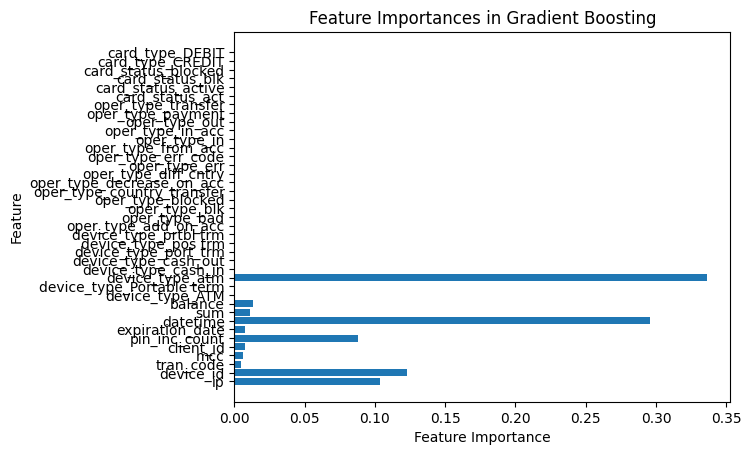

In [ ]:
# Визуализация важности признаков
plt.barh(x.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Gradient Boosting")
plt.show()

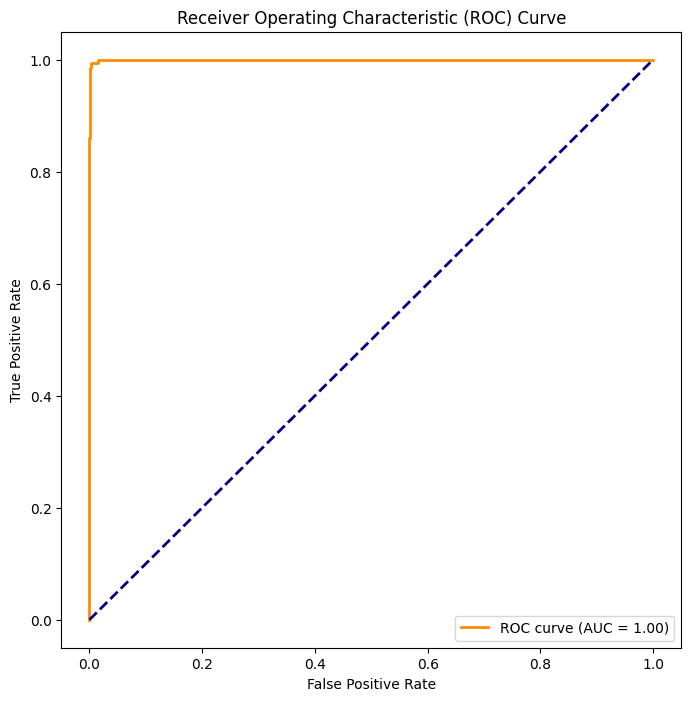

In [ ]:
from sklearn.metrics import roc_curve, auc

# Вычисляем ROC-кривую и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Случайная модель

# Добавляем подписи и легенду
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Отображаем график
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'gradient_boosting_model-0,9998.pkl')

['gradient_boosting_model-0,9998.pkl']

In [ ]:
res = model.predict(x)
res

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
bool_array = res.astype(bool)
bool_array

array([False, False, False, ...,  True,  True,  True])

In [ ]:
import numpy as np
np.savetxt('output.csv', bool_array, fmt='%s', delimiter=',')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# Предсказания модели
y_pred = model.predict(x_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Для вероятностей
y_pred_prob = model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Дополнительная информация
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9983986435568952
Precision: 0.9790575916230366
Recall: 0.935
F1 Score: 0.9565217391304348
ROC AUC Score: 0.9998415898617512

Confusion Matrix:
[[10412     4]
 [   13   187]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10416
           1       0.98      0.94      0.96       200

    accuracy                           1.00     10616
   macro avg       0.99      0.97      0.98     10616
weighted avg       1.00      1.00      1.00     10616



In [ ]:
from sklearn.preprocessing import StandardScaler
# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data, index = x.index, columns = x.columns)
scaled_data

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
0,-0.452063,0.538307,-0.508799,0.618357,1.722683,-0.364263,1.426627,-1.520859,-0.454415,0.541725,...,-0.234603,-0.226353,-0.575443,2.239182,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
1,-1.283145,0.658196,-0.508799,-1.344418,1.722683,-0.364263,1.426627,-1.517685,-0.455599,0.539855,...,-0.234603,-0.226353,-0.575443,2.239182,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
2,0.991093,-1.544473,-0.535444,-0.339037,1.722683,-0.364263,1.426627,-1.480474,-0.455536,0.537985,...,-0.234603,-0.226353,-0.575443,-0.446592,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
3,-0.452063,0.538307,-0.508799,-0.339037,1.722683,-0.364263,1.426627,-1.473670,-0.454944,0.536113,...,-0.234603,-0.226353,-0.575443,2.239182,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
4,1.025575,1.551488,-0.615379,0.129598,1.722683,-0.364263,1.426627,-1.135241,-0.455069,0.537984,...,4.262513,-0.226353,-0.575443,-0.446592,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,-0.451168,-0.756966,-0.535444,-0.894744,-0.008815,-0.364263,0.061103,1.577514,-0.419672,-1.246738,...,-0.234603,-0.226353,-0.575443,-0.446592,1.038437,-1.034956,-0.030085,-0.027803,0.979431,-0.979431
53075,-0.451168,-0.756966,-0.615379,0.605974,-0.641826,-0.364263,0.382403,1.628148,-0.115499,-0.681004,...,-0.234603,-0.226353,-0.575443,-0.446592,-0.962986,0.966225,-0.030085,-0.027803,0.979431,-0.979431
53076,-1.812112,0.679353,-0.615379,-0.703962,1.169619,-0.364263,1.278578,1.600687,0.935054,-1.496629,...,4.262513,-0.226353,-0.575443,-0.446592,-0.962986,0.966225,-0.030085,-0.027803,-1.021001,1.021001
53077,1.023048,-0.608868,-0.535444,0.811461,-1.317521,-0.364263,-1.458772,1.662817,1.676355,-1.448068,...,-0.234603,-0.226353,-0.575443,-0.446592,1.038437,-1.034956,-0.030085,-0.027803,0.979431,-0.979431


In [ ]:
x = scaled_data.drop(['pred'], axis=1)
y = scaled_data['pred']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_test

,pred
4938,0
28359,0
6553,0
25984,0
2929,0
...,...
10468,0
45527,0
27141,0
18677,0


In [ ]:
model = GradientBoostingClassifier(random_state=42, n_estimators=10, max_depth=3, min_samples_leaf=4, min_samples_split=6, learning_rate=0.01,)

In [ ]:
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=4,
                           min_samples_split=6, n_estimators=10,
                           random_state=42)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.981160068765749
0.9811605124340618


In [ ]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.01729856, 0.01729856, 0.01729856, ..., 0.01729856, 0.01729856,
       0.01729856])

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)

In [ ]:
print(f'AUC-ROC Score: {auc_score}')

AUC-ROC Score: 0.9766145833333333


In [ ]:
# Важность признаков
importances = model.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

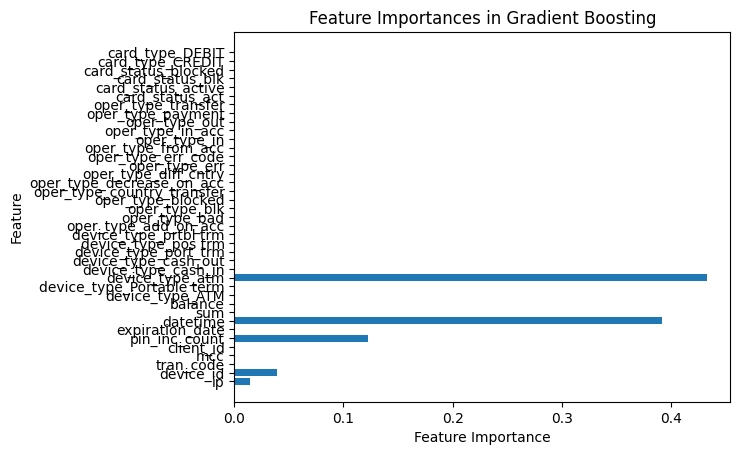

In [ ]:
# Визуализация важности признаков
plt.barh(x.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Gradient Boosting")
plt.show()

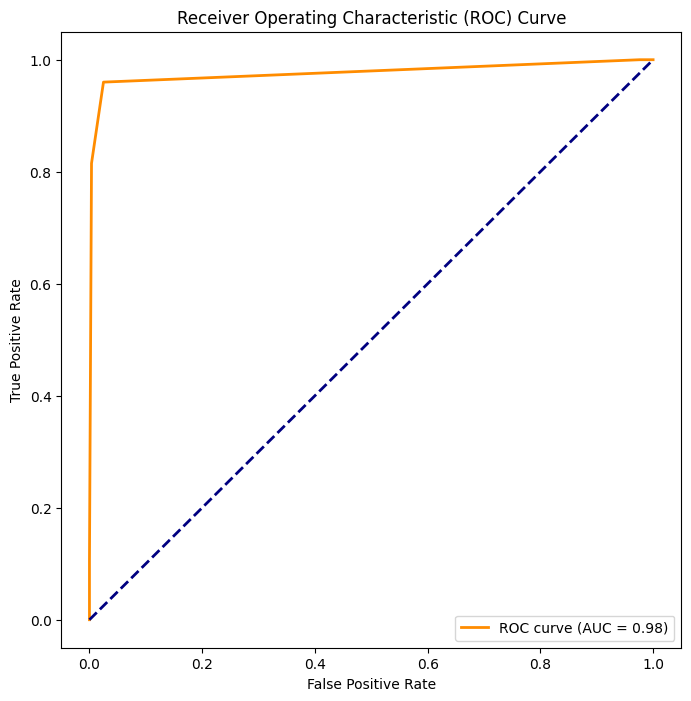

In [ ]:
from sklearn.metrics import roc_curve, auc

# Вычисляем ROC-кривую и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Случайная модель

# Добавляем подписи и легенду
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Отображаем график
plt.show()

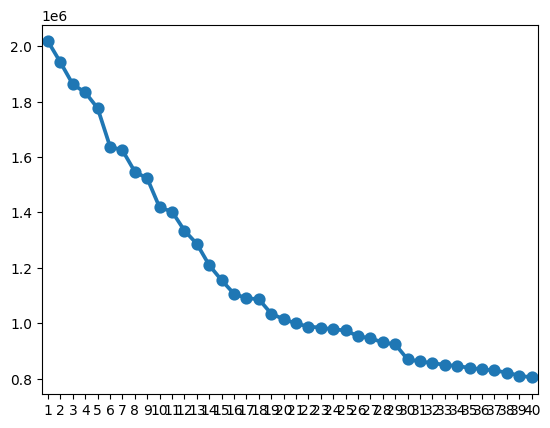

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 41):
    kmeans=KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_data)
    sse[k] = kmeans.inertia_
sns.pointplot(x = list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# строю модель с 16 кластерами
kmeans = KMeans(n_clusters=16, random_state=1)
kmeans.fit(scaled_data)
# вывожу лейблы кластеров
cluster_labels_16 = kmeans.labels_
# добавляю колонку 'Кластер'
scaled_data_clusters = scaled_data.assign(Кластер = cluster_labels_16)

In [ ]:
# сохраняю центроид кластера
x_cluster_centers = kmeans.cluster_centers_
x_cluster_centers

array([[ 2.38849746e-02,  3.63052468e-02, -5.62089152e-01,
         4.21545506e-02, -5.86863579e-03, -3.64263344e-01,
        -2.60185033e-02, -2.47619004e-03, -1.18942120e-02,
         4.23506100e-01, -2.86794341e-01,  3.43413879e-01,
        -4.07377489e-01,  4.99767170e-01, -2.97468332e-01,
        -3.21949038e-01, -2.97543364e-01, -2.23022296e-01,
        -2.15231474e-01, -4.34052963e-03, -4.34052963e-03,
        -2.91423477e-01, -2.29918029e-01, -2.93283728e-01,
        -2.09808461e-01, -2.13404299e-01,  4.41070689e+00,
        -2.29554464e-01, -2.34603409e-01, -2.26353351e-01,
        -5.75443130e-01, -4.46591654e-01,  2.26857491e-02,
        -1.93275337e-02, -3.00853945e-02, -2.78034289e-02,
        -4.35257758e-02,  4.35257758e-02],
       [ 1.25322195e-02,  1.87028890e-03, -5.62089152e-01,
        -5.23576638e-02, -3.77147571e-02, -3.64263344e-01,
         1.32538847e-02, -1.51169403e-02,  3.59888612e-02,
         4.04534598e-01, -2.86794341e-01,  3.36348029e-01,
        -4.07

In [ ]:
# рассчитываю расстояния от центра кластера до каждого значения переменных
dist = kmeans.transform(scaled_data)
dist

array([[7.3970318 , 7.41163373, 6.71133156, ..., 7.36430795, 7.81384325,
        6.57519345],
       [7.61103499, 7.60017185, 7.04454194, ..., 7.5658574 , 8.00198367,
        6.79254716],
       [7.25520256, 7.25246469, 6.78756506, ..., 7.20355479, 8.00623037,
        6.80316428],
       ...,
       [7.77657829, 7.78860594, 7.36071286, ..., 7.7295357 , 8.49016957,
        7.3823202 ],
       [7.3766966 , 7.40358403, 6.45123244, ..., 7.3401639 , 8.14139225,
        6.93340282],
       [4.38154248, 7.91516014, 7.24243615, ..., 7.82711249, 8.6027581 ,
        7.49543762]])

In [ ]:

# помечаю аномальные значения как 1 и нормальные значения как 0 на основе рассчитанных расстояний
km_y_pred = np.array(dist)
km_y_pred[dist>=np.percentile(dist, 20)] = 1
km_y_pred[dist<np.percentile(dist, 20)] = 0
km_y_pred[-20:]

array([[1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,

In [ ]:
len(km_y_pred)

53079

In [ ]:
# создаю DF
fraud_data = pd.DataFrame(km_y_pred, index = scaled_data.index, columns = scaled_data.columns)
fraud_data

ValueError: Shape of passed values is (53079, 16), indices imply (53079, 38)

In [ ]:


# изолирую нормализованные данные с аномальными значениями
fraud_data_fraud = fraud_data[(fraud_data['Дней_с_последней_оплаты']==1)
                              |(fraud_data['Частота']==1)
                              |(fraud_data['Сумма_общая_тыс_руб']==1)
                              |(fraud_data['Длительность_отношений_в_днях']==1)]
scaled_data_fraud = scaled_data_clusters[scaled_data_clusters.index.isin(fraud_data_fraud.index)]
scaled_data_not_fraud = scaled_data_clusters[~scaled_data_clusters.index.isin(fraud_data_fraud.index)]

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=42)
clusters = kmedoids.fit_predict(scaled_data)

In [ ]:
print("Кластеры:")
print(clusters.value_counts())

In [ ]:
filtered_df_by_pred_true

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
364,364,9572404,86.111.0.15,1342.0,pos trm,-1,8860,854388310,CREDIT,3,blk,2026-07-16,2024-10-30 22:46:07,993.05,err,0.000000,True
502,502,4412565,62.118.0.210,537.0,ATM,-1,9112,719370723,DEBIT,3,blocked,2025-06-21,2024-11-26 23:44:57,756.00,err_code,365939.530000,True
627,627,4559799,46.0.2.180,194.0,cash_in,-1,4127,145330378,DEBIT,3,blocked,2028-05-01,2024-10-31 09:54:56,1053.18,err,900446.090000,True
935,935,5981674,46.8.0.225,785.0,ATM,-1,9102,357284945,CREDIT,3,blocked,2025-07-16,2024-11-19 09:44:45,515.77,err_code,0.000000,True
977,977,7233473,37.0.123.30,320.0,cash_in,-1,3153,678527916,CREDIT,3,blocked,2028-08-01,2024-10-15 07:04:06,912.14,err,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True


In [ ]:
# filtered_df_by_pred_true.head(50)
# filtered_df_by_pred_true['client_id'].value_counts()
filtered_df_by_pred_true1 = filtered_df_by_pred_true[filtered_df_by_pred_true['id'] > 51203]
filtered_df_by_pred_true1['device_type'].unique()

array(['atm'], dtype=object)

In [ ]:
filtered_df_by_pred_true['client_id'].value_counts()

,count
client_id,
481348272,2
545445024,2
854388310,1
113666551,1
765571752,1
...,...
850944455,1
524606111,1
404249033,1


In [ ]:
filtered_df_by_pred_true[filtered_df_by_pred_true['datetime'] >= '2024-01-01 00:00']

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
364,364,9572404,86.111.0.15,1342.0,pos trm,-1,8860,854388310,CREDIT,3,blk,2026-07-16,2024-10-30 22:46:07,993.05,err,0.000000,True
502,502,4412565,62.118.0.210,537.0,ATM,-1,9112,719370723,DEBIT,3,blocked,2025-06-21,2024-11-26 23:44:57,756.00,err_code,365939.530000,True
627,627,4559799,46.0.2.180,194.0,cash_in,-1,4127,145330378,DEBIT,3,blocked,2028-05-01,2024-10-31 09:54:56,1053.18,err,900446.090000,True
935,935,5981674,46.8.0.225,785.0,ATM,-1,9102,357284945,CREDIT,3,blocked,2025-07-16,2024-11-19 09:44:45,515.77,err_code,0.000000,True
977,977,7233473,37.0.123.30,320.0,cash_in,-1,3153,678527916,CREDIT,3,blocked,2028-08-01,2024-10-15 07:04:06,912.14,err,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True


In [ ]:
df_combined[df_combined['datetime'] == 481348272]

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
7697,7697,1122237,37.0.124.105,728.0,cash_in,10,3825,481348272,CREDIT,0,act,2030-05-20,2022-01-03 20:07:44,183.12,in,637737.120000,False
7698,7698,1223857,46.173.0.120,503.0,ATM,20,4492,481348272,CREDIT,0,act,2030-05-20,2022-02-03 19:29:57,183.23,out,637553.890000,False
7699,7699,1259309,188.0.166.240,1316.0,pos trm,451,9969,481348272,CREDIT,0,act,2030-05-20,2022-02-07 00:34:08,183.10,payment,637370.790000,False
7700,7700,1318029,45.154.0.135,305.0,cash_in,30,7907,481348272,CREDIT,0,act,2030-05-20,2022-02-17 03:23:05,183.06,transfer,637187.730000,False
7701,7701,1402435,37.0.124.165,732.0,ATM,20,9969,481348272,CREDIT,0,act,2030-05-20,2022-03-21 06:58:22,182.86,decrease_on_acc,637004.870000,False
7702,7702,1436318,78.24.158.174,945.0,cash_in,10,1197,481348272,CREDIT,0,act,2030-05-20,2022-03-25 10:51:51,183.07,in_acc,637187.940000,False
7703,7703,1573667,185.233.0.165,89.0,pos trm,451,8168,481348272,CREDIT,0,act,2030-05-20,2022-03-28 15:16:08,182.98,payment,637004.960000,False
7704,7704,1616748,46.0.123.195,927.0,prtbl trm,30,4492,481348272,CREDIT,0,act,2030-05-20,2022-04-10 01:35:31,183.02,transfer,636821.940000,False
7705,7705,1698427,46.0.123.195,927.0,prtbl trm,451,7010,481348272,CREDIT,0,act,2030-05-20,2022-04-20 16:36:29,183.03,payment,636638.910000,False
7706,7706,1739089,37.0.127.90,1028.0,prtbl trm,30,3954,481348272,CREDIT,0,act,2030-05-20,2022-04-26 19:29:40,183.11,transfer,636455.800000,False


In [ ]:
filtered_df_by_pred_true['datetime'] = pd.to_datetime(filtered_df_by_pred_true['datetime'])

<ipython-input-15-f163690c803e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_by_pred_true['datetime'] = pd.to_datetime(filtered_df_by_pred_true['datetime'])


In [ ]:
filtered_df_by_pred_true123 = filtered_df_by_pred_true
filtered_df_by_pred_true123['year_month'] = filtered_df_by_pred_true123['datetime'].dt.to_period('M')  # Год-месяц
filtered_df_by_pred_true123

<ipython-input-16-7c57f07997d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_by_pred_true123['year_month'] = filtered_df_by_pred_true123['datetime'].dt.to_period('M')  # Год-месяц


,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred,year_month
364,364,9572404,86.111.0.15,1342.0,pos trm,-1,8860,854388310,CREDIT,3,blk,2026-07-16,2024-10-30 22:46:07,993.05,err,0.000000,True,2024-10
502,502,4412565,62.118.0.210,537.0,ATM,-1,9112,719370723,DEBIT,3,blocked,2025-06-21,2024-11-26 23:44:57,756.00,err_code,365939.530000,True,2024-11
627,627,4559799,46.0.2.180,194.0,cash_in,-1,4127,145330378,DEBIT,3,blocked,2028-05-01,2024-10-31 09:54:56,1053.18,err,900446.090000,True,2024-10
935,935,5981674,46.8.0.225,785.0,ATM,-1,9102,357284945,CREDIT,3,blocked,2025-07-16,2024-11-19 09:44:45,515.77,err_code,0.000000,True,2024-11
977,977,7233473,37.0.123.30,320.0,cash_in,-1,3153,678527916,CREDIT,3,blocked,2028-08-01,2024-10-15 07:04:06,912.14,err,0.000000,True,2024-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True,2024-10
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True,2024-11
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True,2024-11
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True,2024-11


In [ ]:
import matplotlib.pyplot as plt

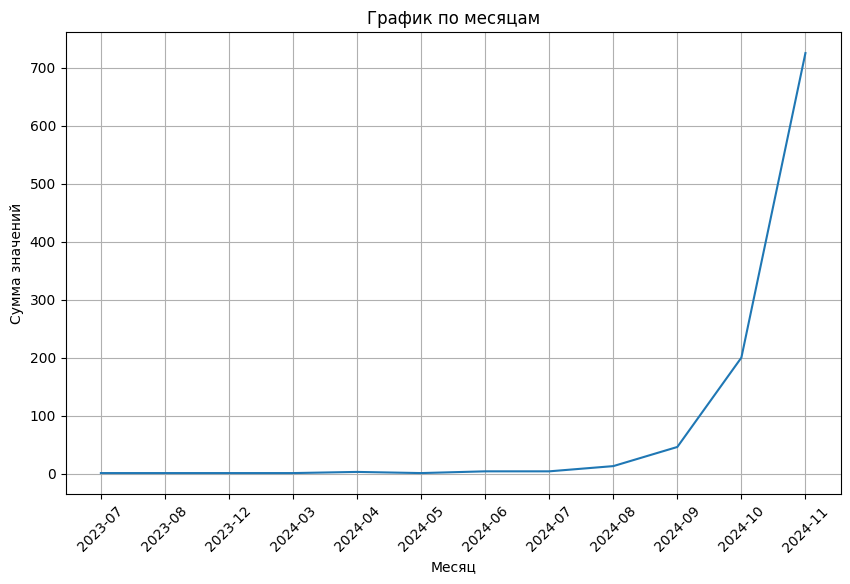

In [ ]:
# Агрегируем значения по year_month
monthly_counts = filtered_df_by_pred_true123['year_month'].value_counts().sort_index()
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values)
plt.xlabel('Месяц')
plt.ylabel('Сумма значений')
plt.title('График по месяцам')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
filtered_df_by_pred_true

,ip,device_id,tran_code,mcc,client_id,pin_inc_count,expiration_date,datetime,sum,balance,...,oper_type_in_acc,oper_type_out,oper_type_payment,oper_type_transfer,card_status_act,card_status_active,card_status_blk,card_status_blocked,card_type_CREDIT,card_type_DEBIT
364,1450115087,1342.0,-1,8860,854388310,3,1.784160e+09,1.730328e+09,993.05,0.000000,...,0,0,0,0,0,0,1,0,1,0
502,1047920850,537.0,-1,9112,719370723,3,1.750464e+09,1.732665e+09,756.00,365939.530000,...,0,0,0,0,0,0,0,1,0,1
627,771752628,194.0,-1,4127,145330378,3,1.840752e+09,1.730368e+09,1053.18,900446.090000,...,0,0,0,0,0,0,0,1,0,1
935,772276449,785.0,-1,9102,357284945,3,1.752624e+09,1.732009e+09,515.77,0.000000,...,0,0,0,0,0,0,0,1,1,0
977,620788510,320.0,-1,3153,678527916,3,1.848701e+09,1.728976e+09,912.14,0.000000,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,1534722063,431.0,25,3193,526745565,0,1.832371e+09,1.730108e+09,521.37,183309.130385,...,0,0,0,0,1,0,0,0,1,0
53075,1534722063,431.0,10,7071,364757022,0,1.849997e+09,1.731469e+09,618.99,337518.880175,...,0,0,0,0,0,1,0,0,1,0
53076,39715056,1042.0,10,3686,828308371,0,1.899158e+09,1.730731e+09,956.15,115192.932982,...,1,0,0,0,0,1,0,0,0,1
53077,3154158155,494.0,25,7602,191845802,0,1.748995e+09,1.732401e+09,1194.06,128429.849643,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
filtered_df_by_pred_true['ip'].value_counts()

,count
ip,
1427439721,45
2147504414,44
3238041042,44
3154158155,44
1407058100,44
...,...
3647996114,1
1533739143,1
1490157808,1


In [ ]:
df[df['pred'] == True][['ip', 'device_type']].value_counts().head(50)

,,count
ip,device_type,
85.21.0.105,atm,45
188.0.162.75,atm,44
2.94.0.240,atm,44
128.0.81.30,atm,44
193.0.149.210,atm,44
178.44.0.90,atm,44
31.204.0.225,atm,44
188.0.175.30,atm,44
83.222.0.180,atm,44


In [ ]:
df[df['ip'] == '46.0.188.45'].head(50)

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
2154,2154,3024110,46.0.188.45,1231.0,cash_out,30,4007,380060374,DEBIT,0,active,2026-06-26,2023-03-16 21:42:50,107.09,transfer,528354.72,False
2156,2156,3485130,46.0.188.45,1231.0,cash_out,25,5117,380060374,DEBIT,0,active,2026-06-26,2023-05-02 19:20:38,107.03,diff_cntry,528140.70,False
2174,2174,6976057,46.0.188.45,1231.0,cash_out,-1,6932,380060374,DEBIT,2,active,2026-06-26,2024-08-27 12:43:10,107.01,err_code,526963.95,False
5011,5011,5374594,46.0.188.45,1231.0,cash_out,20,1157,429842896,CREDIT,0,active,2025-02-01,2023-02-15 13:52:40,363.89,from_acc,267455.76,False
14592,14592,9781619,46.0.188.45,1231.0,cash_out,20,1743,404249033,DEBIT,0,act,2028-03-22,2024-08-25 13:31:53,295.04,decrease_on_acc,644952.88,False
15247,15247,3845405,46.0.188.45,1231.0,cash_out,20,5260,243732473,DEBIT,0,act,2030-12-16,2022-09-22 12:35:01,467.10,from_acc,415922.17,False
17522,17522,6460563,46.0.188.45,1231.0,cash_out,20,4446,113952064,CREDIT,0,active,2029-07-07,2024-03-12 17:44:45,1123.03,from_acc,410230.81,False
19544,19544,6100530,46.0.188.45,1231.0,cash_out,20,9665,921537863,CREDIT,0,active,2028-07-17,2024-05-10 06:58:47,360.96,out,722386.38,False
25530,25530,1329854,46.0.188.45,1231.0,cash_out,-1,2828,891226415,DEBIT,1,active,2029-05-25,2022-02-13 21:22:23,778.01,bad,467676.91,False
25560,25560,6796514,46.0.188.45,1231.0,cash_out,-1,4498,891226415,DEBIT,1,active,2029-05-25,2023-09-13 07:43:54,777.96,err,452896.34,False


In [ ]:
df

,id,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance,pred
0,0,1157921,91.107.0.90,982.0,prtbl trm,30,7103,969838140,DEBIT,0,active,2030-06-10,2022-03-09 09:56:51,510.22,transfer,670814.780000,False
1,1,1595205,37.0.127.150,1033.0,port_trm,30,2031,969838140,DEBIT,0,active,2030-06-10,2022-03-10 09:38:45,509.84,transfer,670304.940000,False
2,2,1656884,185.233.0.240,96.0,atm,25,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-21 23:29:57,509.86,diff_cntry,669795.080000,False
3,3,1673909,91.107.0.90,982.0,prtbl trm,30,4629,969838140,DEBIT,0,active,2030-06-10,2022-03-24 02:18:28,510.05,transfer,669285.030000,False
4,4,1689203,188.43.0.135,1413.0,ATM,10,5840,969838140,DEBIT,0,active,2030-06-10,2022-07-07 09:22:18,510.01,in_acc,669795.040000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53074,53074,9919604,91.122.0.15,431.0,atm,25,3193,526745565,CREDIT,0,act,2028-01-25,2024-10-28 09:38:58,521.37,country_transfer,183309.130385,True
53075,53075,9902369,91.122.0.15,431.0,atm,10,7071,364757022,CREDIT,0,active,2028-08-16,2024-11-13 03:44:07,618.99,add_on_acc,337518.880175,True
53076,53076,9939711,2.94.0.240,1042.0,atm,10,3686,828308371,DEBIT,0,active,2030-03-08,2024-11-04 14:41:05,956.15,in_acc,115192.932982,True
53077,53077,9876313,188.0.162.75,494.0,atm,25,7602,191845802,CREDIT,0,act,2025-06-04,2024-11-23 22:36:43,1194.06,diff_cntry,128429.849643,True
